In [1]:
import torch
import hiddenlayer as hl

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn


In [2]:
data = pd.read_csv('datasets/bike_sharing.csv', index_col=0)

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.shape

(731, 16)

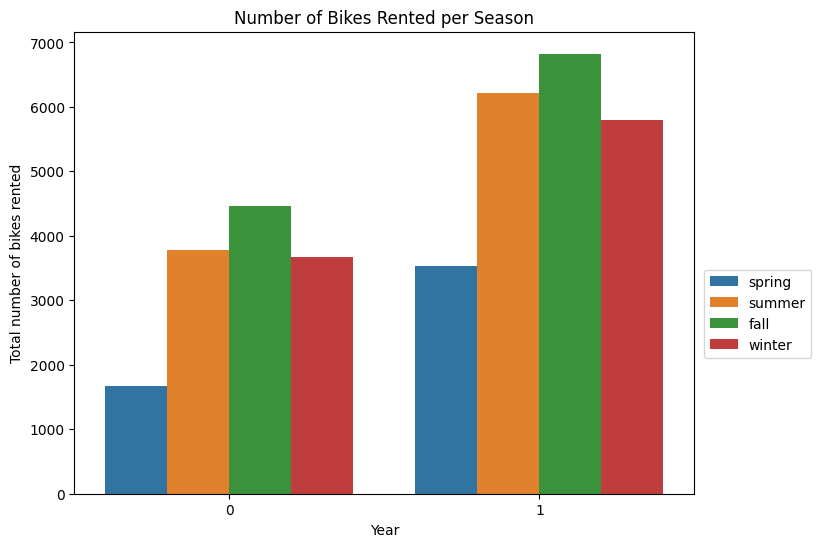

In [5]:
plt.figure(figsize=(8, 6))

sns.barplot(x='yr', y='cnt', hue='season', data=data, errorbar=None)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5))

plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')

plt.title("Number of Bikes Rented per Season");

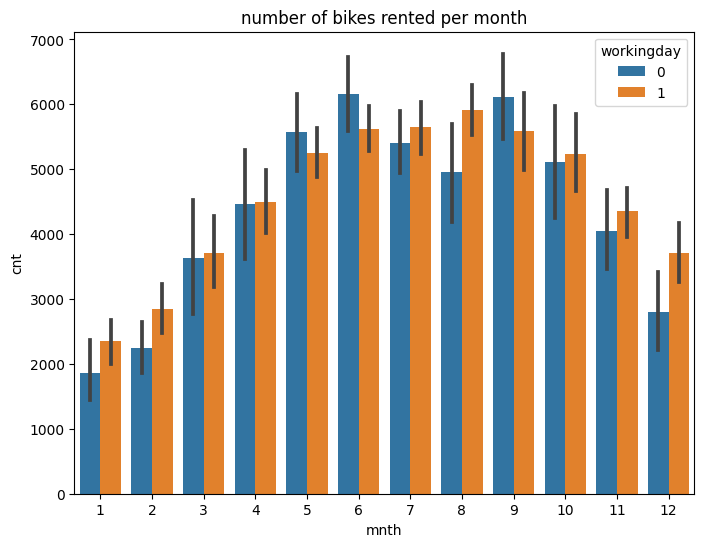

In [6]:
plt.figure(figsize=(8, 6))

sns.barplot(x='mnth', y='cnt', hue='workingday', data = data)
plt.title('number of bikes rented per month')
plt.show();

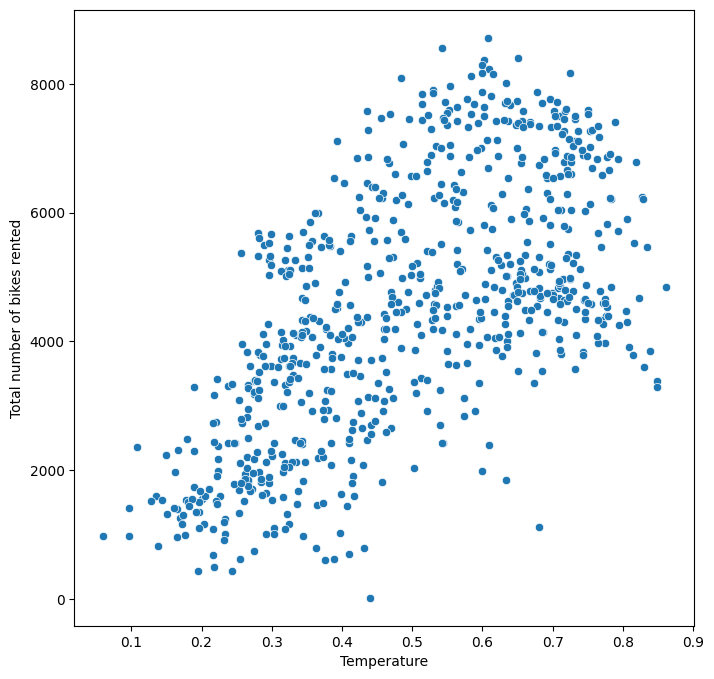

In [7]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x = 'temp', y= 'cnt', data= data)

plt.xlabel('Temperature')
plt.ylabel('Total number of bikes rented');

In [8]:
data = pd.get_dummies(data, columns = ['season'])
data.sample(5)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_fall,season_spring,season_summer,season_winter
624,625,2012-09-16,1,9,0,0,0,1,0.580000,0.563125,0.570000,0.090183,2166,5167,7333,1,0,0,0
679,680,2012-11-10,1,11,0,6,0,1,0.389167,0.393937,0.645417,0.057846,2090,4446,6536,0,0,0,1
495,496,2012-05-10,1,5,0,4,1,1,0.505833,0.491783,0.552083,0.314063,1026,5546,6572,0,0,1,0
279,280,2011-10-07,0,10,0,5,1,1,0.510833,0.504404,0.684167,0.022392,949,4036,4985,0,0,0,1
455,456,2012-03-31,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235,0,0,1,0


In [9]:
columns = ['registered', 'holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'season_fall', 'season_spring', 'season_summer', 'season_winter']
features = data[columns]

In [10]:
features.head()

,registered,holiday,weekday,weathersit,temp,atemp,season_fall,season_spring,season_summer,season_winter
0,654,0,6,2,0.344167,0.363625,0,1,0,0
1,670,0,0,2,0.363478,0.353739,0,1,0,0
2,1229,0,1,1,0.196364,0.189405,0,1,0,0
3,1454,0,2,1,0.200000,0.212122,0,1,0,0
4,1518,0,3,1,0.226957,0.229270,0,1,0,0


In [11]:
target= data[["cnt"]]

In [12]:
target.head()

,cnt
0,985
1,801
2,1349
3,1562
4,1600


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [15]:
X_train_tensor = torch.tensor(X_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

Y_train_tensor = torch.tensor(Y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

In [16]:
X_train_tensor.shape

torch.Size([584, 10])

In [17]:
Y_train_tensor.shape

torch.Size([584, 1])

In [18]:
import torch.utils.data as data_utils

In [19]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)

In [20]:
train_loader = data_utils.DataLoader(train_data, batch_size = 100, shuffle = True)

In [21]:
len(train_loader)

6

In [22]:
features_batch, target_batch = iter(train_loader).next()

In [23]:
features_batch.shape

torch.Size([100, 10])

In [24]:
target_batch.shape

torch.Size([100, 1])

In [25]:
inp = X_train_tensor.shape[1]
out = 1

hid = 10
loss_fn = torch.nn.MSELoss()

In [26]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid), torch.nn.Linear(hid, out))

In [27]:
#hl.build_graph(model, torch.zeros([10, inp]))

In [28]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [29]:
total_step = len(train_loader)

num_epochs = 10000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 2000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10000], Step [1/6], Loss: 24634444.0000
Epoch [1/10000], Step [2/6], Loss: 23871464.0000
Epoch [1/10000], Step [3/6], Loss: 25305848.0000
Epoch [1/10000], Step [4/6], Loss: 23823770.0000
Epoch [1/10000], Step [5/6], Loss: 23378132.0000
Epoch [1/10000], Step [6/6], Loss: 20723626.0000
Epoch [2001/10000], Step [1/6], Loss: 302149.7500
Epoch [2001/10000], Step [2/6], Loss: 425594.5625
Epoch [2001/10000], Step [3/6], Loss: 283236.0312
Epoch [2001/10000], Step [4/6], Loss: 421059.1562
Epoch [2001/10000], Step [5/6], Loss: 315768.0938
Epoch [2001/10000], Step [6/6], Loss: 371998.9375
Epoch [4001/10000], Step [1/6], Loss: 327699.0312
Epoch [4001/10000], Step [2/6], Loss: 312371.4688
Epoch [4001/10000], Step [3/6], Loss: 287335.4062
Epoch [4001/10000], Step [4/6], Loss: 346144.9688
Epoch [4001/10000], Step [5/6], Loss: 198442.7344
Epoch [4001/10000], Step [6/6], Loss: 373215.6250
Epoch [6001/10000], Step [1/6], Loss: 296904.0938
Epoch [6001/10000], Step [2/6], Loss: 329002.2500
Epoch 

In [31]:
model.eval()

with torch.no_grad():
    y_pred = model(x_test_tensor)

In [32]:
sample = x_test.iloc[45]
sample

registered       4340.000000
holiday             0.000000
weekday             0.000000
weathersit          1.000000
temp                0.743333
atemp               0.674254
season_fall         1.000000
season_spring       0.000000
season_summer       0.000000
season_winter       0.000000
Name: 540, dtype: float64

In [33]:
sample_tensor = torch.tensor(sample.values, dtype=torch.float)
sample_tensor

tensor([4.3400e+03, 0.0000e+00, 0.0000e+00, 1.0000e+00, 7.4333e-01, 6.7425e-01,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [35]:
with torch.no_grad():
    y_pred = model(sample_tensor)

print('Predicted count: ', (y_pred.item()))
print('Actual count: ', (y_test.iloc[45]))

Predicted count:  5518.66259765625
Actual count:  cnt    6891
Name: 540, dtype: int64


In [36]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [37]:
y_pred = y_pred_tensor.detach().numpy()
y_pred.shape

(147, 1)

In [38]:
y_test.values.shape

(147, 1)

In [40]:
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted':np.squeeze(y_pred)})
compare_df.sample(10)

,actual,predicted
111,7393,7660.094238
47,4390,5092.189453
127,2485,2358.644775
50,1834,2012.884521
7,2918,2663.896240
110,2999,2979.708740
89,1796,1614.629150
138,7697,7898.385742
23,4322,4562.887695
104,4128,4386.917969


In [41]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9015805457938818

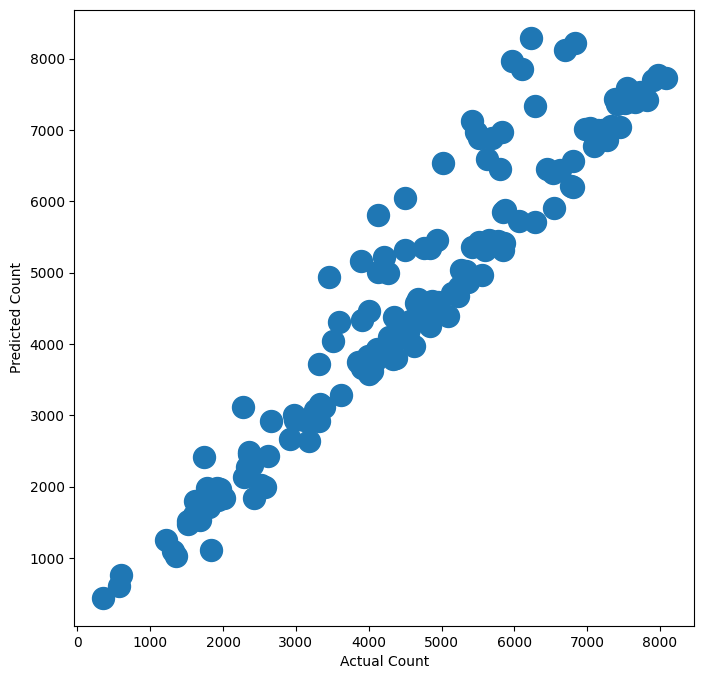

In [42]:
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, y_test.values, s=250)
plt.xlabel("Actual Count")
plt.ylabel('Predicted Count')
plt.show()